In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

city = pd.read_csv("./Pyber/data/city_data.csv")
ride = pd.read_csv("./Pyber/data/ride_data.csv")

#determine total rides, total fares, and average fare per city
num_fare = []
total_fare = []
avg_fare = []

for x in city["city"]:
    urb = ride.loc[ride["city"] == x]
    avg_fare.append(round(urb["fare"].mean(),2))
    num_fare.append(len(urb["ride_id"]))
    total_fare.append(urb["fare"].sum())

#collate into one frame with city data    
city["ride_count"] = num_fare
city["avg_fare"] = avg_fare
city["total_fares"] = total_fare

city.head()

,city,driver_count,type,ride_count,avg_fare,total_fares
0,Richardfort,38,Urban,28,22.37,626.45
1,Williamsstad,59,Urban,23,24.36,560.33
2,Port Angela,67,Urban,19,23.84,452.90
3,Rodneyfort,34,Urban,23,28.62,658.19
4,West Robert,39,Urban,31,25.12,778.84


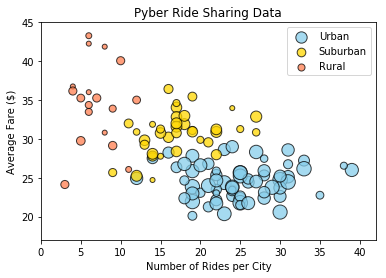

In [2]:
#divide into frames by city type

urban = city.loc[city["type"] == "Urban"]
suburb = city.loc[city["type"] == "Suburban"]
rural = city.loc[city["type"] == "Rural"]

#bubble-chart of ride data
#number of rides x-axis
#average fare y-axis
#number of drivers in city shown by area of bubble
#city type shown by color
plt.scatter(urban["ride_count"], urban["avg_fare"], s = np.sqrt(urban["driver_count"]) * 25,
            facecolors = 'skyblue', edgecolors = 'black', label = "Urban", alpha = .75)
plt.scatter(suburb["ride_count"], suburb["avg_fare"], s = np.sqrt(suburb["driver_count"]) * 25,
           facecolors = 'gold', edgecolors = 'black', label = "Suburban", alpha = .75)
plt.scatter(rural["ride_count"], rural["avg_fare"], s = np.sqrt(rural["driver_count"]) * 25,
            facecolors = 'coral', edgecolors = 'black', label = "Rural", alpha = .75)
plt.xlim(0, 42)
plt.ylim(17, 45)
plt.ylabel("Average Fare ($)")
plt.xlabel("Number of Rides per City")
plt.title("Pyber Ride Sharing Data")
plt.legend(loc = 'upper right')
plt.show()



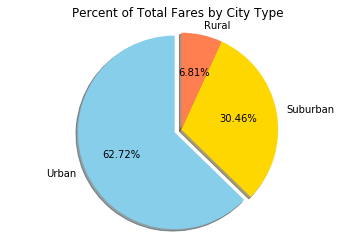

In [3]:
#total fares pie chart
labels_t = ["Urban", "Suburban", "Rural"]
total_fares = [urban["total_fares"].sum(), suburb["total_fares"].sum(), rural["total_fares"].sum()]
colors = ['skyblue', 'gold', 'coral']
explode = [.075, 0, 0]
plt.pie(total_fares, labels = labels_t, colors = colors, explode = explode, autopct="%1.2f%%", 
        shadow = True, startangle = 90)
plt.title("Percent of Total Fares by City Type")
plt.axis("equal")
plt.show()

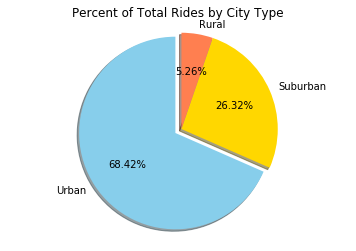

In [4]:
#total rides pie chart
labels_r = ["Urban", "Suburban", "Rural"]
total_rides = [urban["ride_count"].sum(), suburb["ride_count"].sum(), rural["ride_count"].sum()]
colors = ['skyblue', 'gold', 'coral']
explode = [.075, 0, 0]
plt.pie(total_rides, labels = labels_r, colors = colors, explode = explode, autopct="%1.2f%%", 
        shadow = True, startangle = 90)
plt.title("Percent of Total Rides by City Type")
plt.axis("equal")
plt.show()

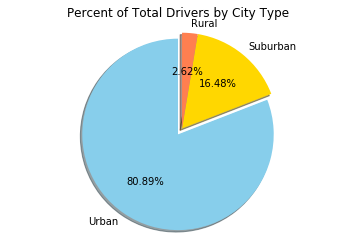

In [5]:
#total drivers pie chart
labels_d = ["Urban", "Suburban", "Rural"]
total_drivers = [urban["driver_count"].sum(), suburb["driver_count"].sum(), rural["driver_count"].sum()]
colors = ['skyblue', 'gold', 'coral']
explode = [.075, 0, 0]
plt.pie(total_drivers, labels = labels_d, colors = colors, explode = explode, autopct="%1.2f%%", 
        shadow = True, startangle = 90)
plt.title("Percent of Total Drivers by City Type")
plt.axis("equal")
plt.show()


In [8]:
urban['ride_count'].max()

39